In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats as stats
import matplotlib.dates as mdates

import plotly.express as px
import plotly.figure_factory as ff
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

import shap

import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import StandardScaler

sns.set()
sns.set_style("whitegrid")

%precision 3

pd.set_option('precision', 3)
# Enable Jupyter Notebook's intellisense
%config IPCompleter.greedy=True

In [4]:
yellow_tripdata_2020 = pd.read_csv('data_sets/yellow_tripdata_2020_END&STARTTRIPLOCATION.csv')
yellow_tripdata_2020.describe()

,Month,PUManhattan,PUBronx,PUQueens,PUStatenIsland,PUBrooklyn,PUEWR,DOManhattan,DOBronx,DOQueens,DOStatenIsland,DOBrooklyn,DOEWR
count,12.000,1.200e+01,12.000,12.000,12.000,12.000,12.000,1.200e+01,12.000,12.000,12.000,12.000,12.000
mean,6.500,1.872e+06,12401.250,117653.667,277.583,32993.833,176.250,1.812e+06,28055.833,101008.417,741.500,88138.833,2881.083
std,3.606,1.966e+06,2837.763,139709.858,86.180,18951.211,255.965,1.918e+06,9220.084,109167.641,438.424,83465.488,4384.460
min,1.000,2.130e+05,5422.000,10084.000,119.000,7226.000,9.000,1.982e+05,11201.000,12870.000,223.000,12917.000,86.000
25%,3.750,6.514e+05,11283.000,43780.500,218.250,22623.250,32.500,6.207e+05,23290.750,41580.250,469.250,33217.750,499.000
50%,6.500,1.275e+06,13256.500,61803.500,262.000,29145.000,63.000,1.234e+06,28557.000,58267.500,657.000,62346.000,867.000
75%,9.250,1.844e+06,14279.750,97184.250,356.250,33998.250,141.000,1.782e+06,29922.750,89491.000,885.250,91206.500,2102.250
max,12.000,5.846e+06,15208.000,425439.000,395.000,71164.000,755.000,5.701e+06,45650.000,333211.000,1630.000,256453.000,12148.000


                Month  PUManhattan  PUBronx  PUQueens  PUStatenIsland  \
Month            1.00        -0.58     0.55     -0.65            0.42   
PUManhattan     -0.58         1.00     0.11      0.99            0.20   
PUBronx          0.55         0.11     1.00      0.07            0.68   
PUQueens        -0.65         0.99     0.07      1.00            0.15   
PUStatenIsland   0.42         0.20     0.68      0.15            1.00   
PUBrooklyn      -0.48         0.98     0.28      0.97            0.29   
PUEWR           -0.69         0.98     0.02      1.00            0.12   
DOManhattan     -0.58         1.00     0.11      0.99            0.20   
DOBronx         -0.22         0.89     0.54      0.86            0.45   
DOQueens        -0.65         1.00     0.07      1.00            0.15   
DOStatenIsland  -0.56         0.89     0.19      0.89            0.36   
DOBrooklyn      -0.62         0.99     0.10      0.99            0.14   
PUEWR.1         -0.69         0.99     0.00      1.

<AxesSubplot:>

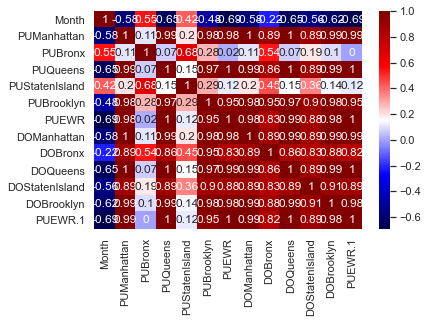

In [5]:
correlation_matrix = yellow_tripdata_2020.corr().round(2)
print(correlation_matrix)
sns.heatmap(data=correlation_matrix, annot=True, cmap = "seismic")

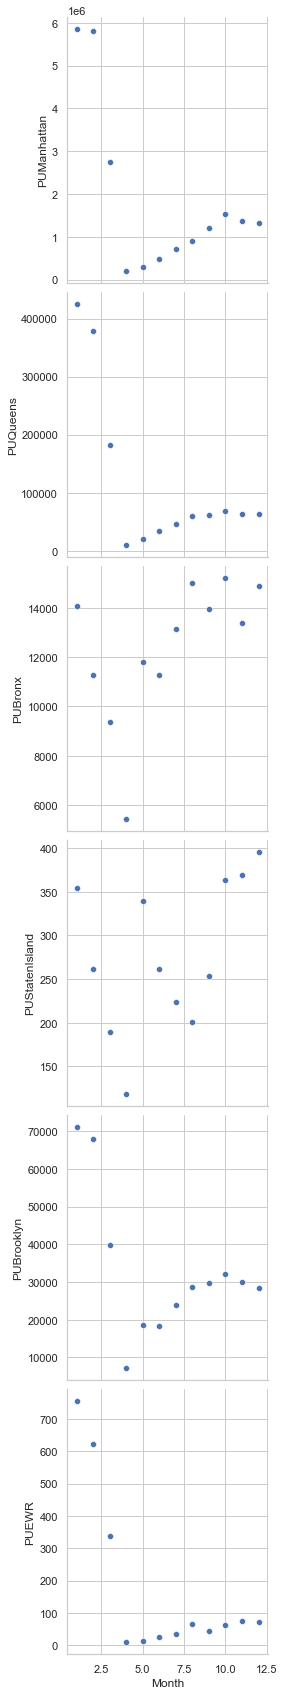

In [10]:
sns.pairplot(yellow_tripdata_2020, x_vars='Month', 
             y_vars=['PUManhattan', 'PUQueens','PUBronx','PUStatenIsland','PUBrooklyn','PUEWR'], height=4, aspect=1, kind='scatter')
plt.show()

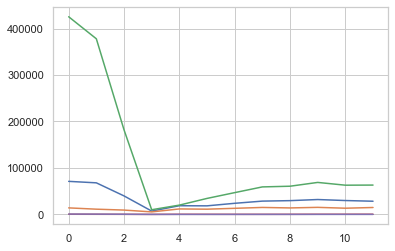

In [48]:
plt.plot(yellow_tripdata_2020['PUBrooklyn'])
plt.plot(yellow_tripdata_2020['PUBronx'])
plt.plot(yellow_tripdata_2020['PUQueens'])
plt.plot(yellow_tripdata_2020['PUStatenIsland'])
plt.plot(yellow_tripdata_2020['PUEWR'])

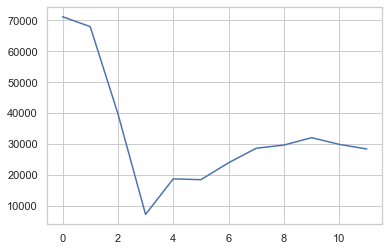

In [49]:
plt.plot(yellow_tripdata_2020['PUBrooklyn'])

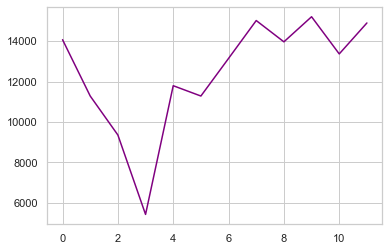

In [64]:
plt.plot(yellow_tripdata_2020['PUBronx'],color="purple")

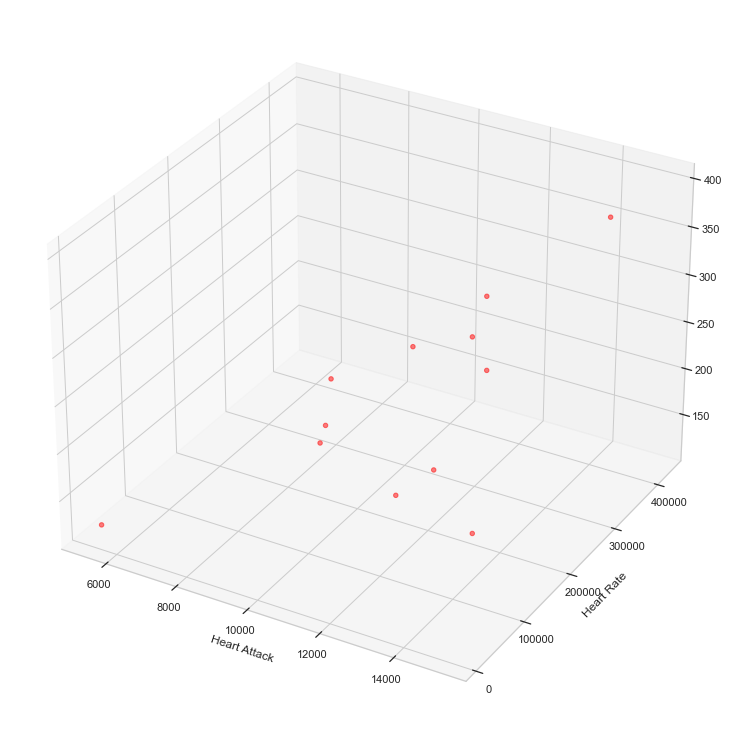

In [86]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
ax.scatter(yellow_tripdata_2020['PUBronx'], yellow_tripdata_2020['PUQueens'],yellow_tripdata_2020['PUStatenIsland'],  c="red", s=20, alpha=0.5)
plt.xlabel('Heart Attack')
plt.ylabel('Heart Rate')
plt.show()

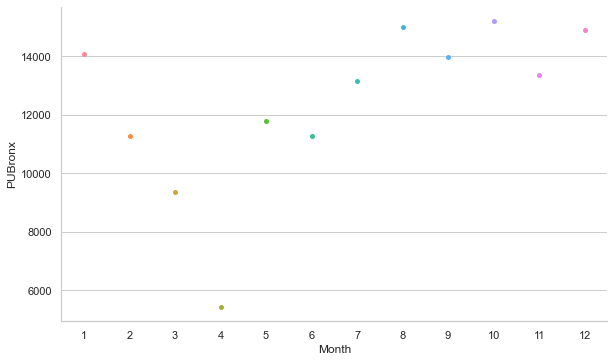

In [96]:
sns.catplot(data=yellow_tripdata_2020, x="Month", y="PUBronx",aspect=1.7,kind="swarm")

<AxesSubplot:>

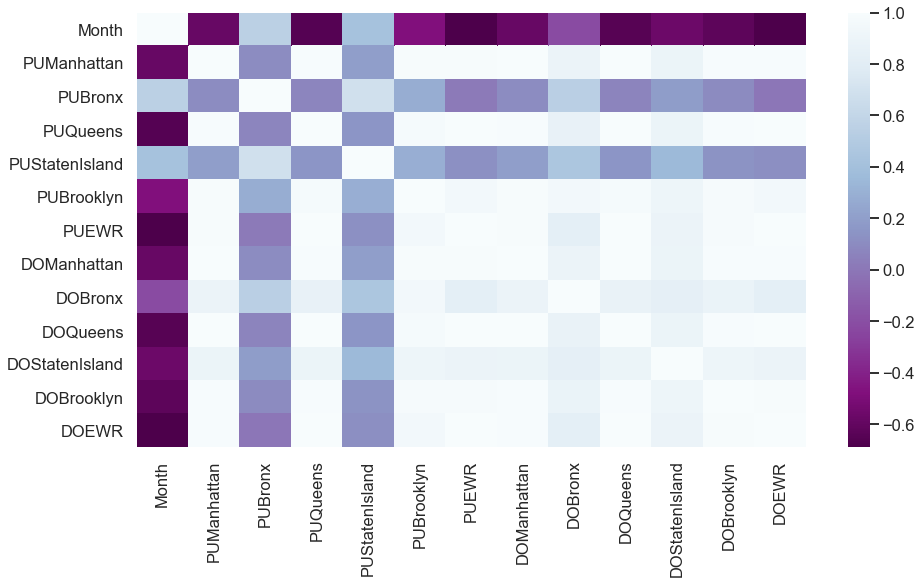

In [69]:
plt.figure(figsize=(15,8))
sns.heatmap(yellow_tripdata_2020.corr(),cmap="BuPu_r")

<Figure size 432x288 with 0 Axes>

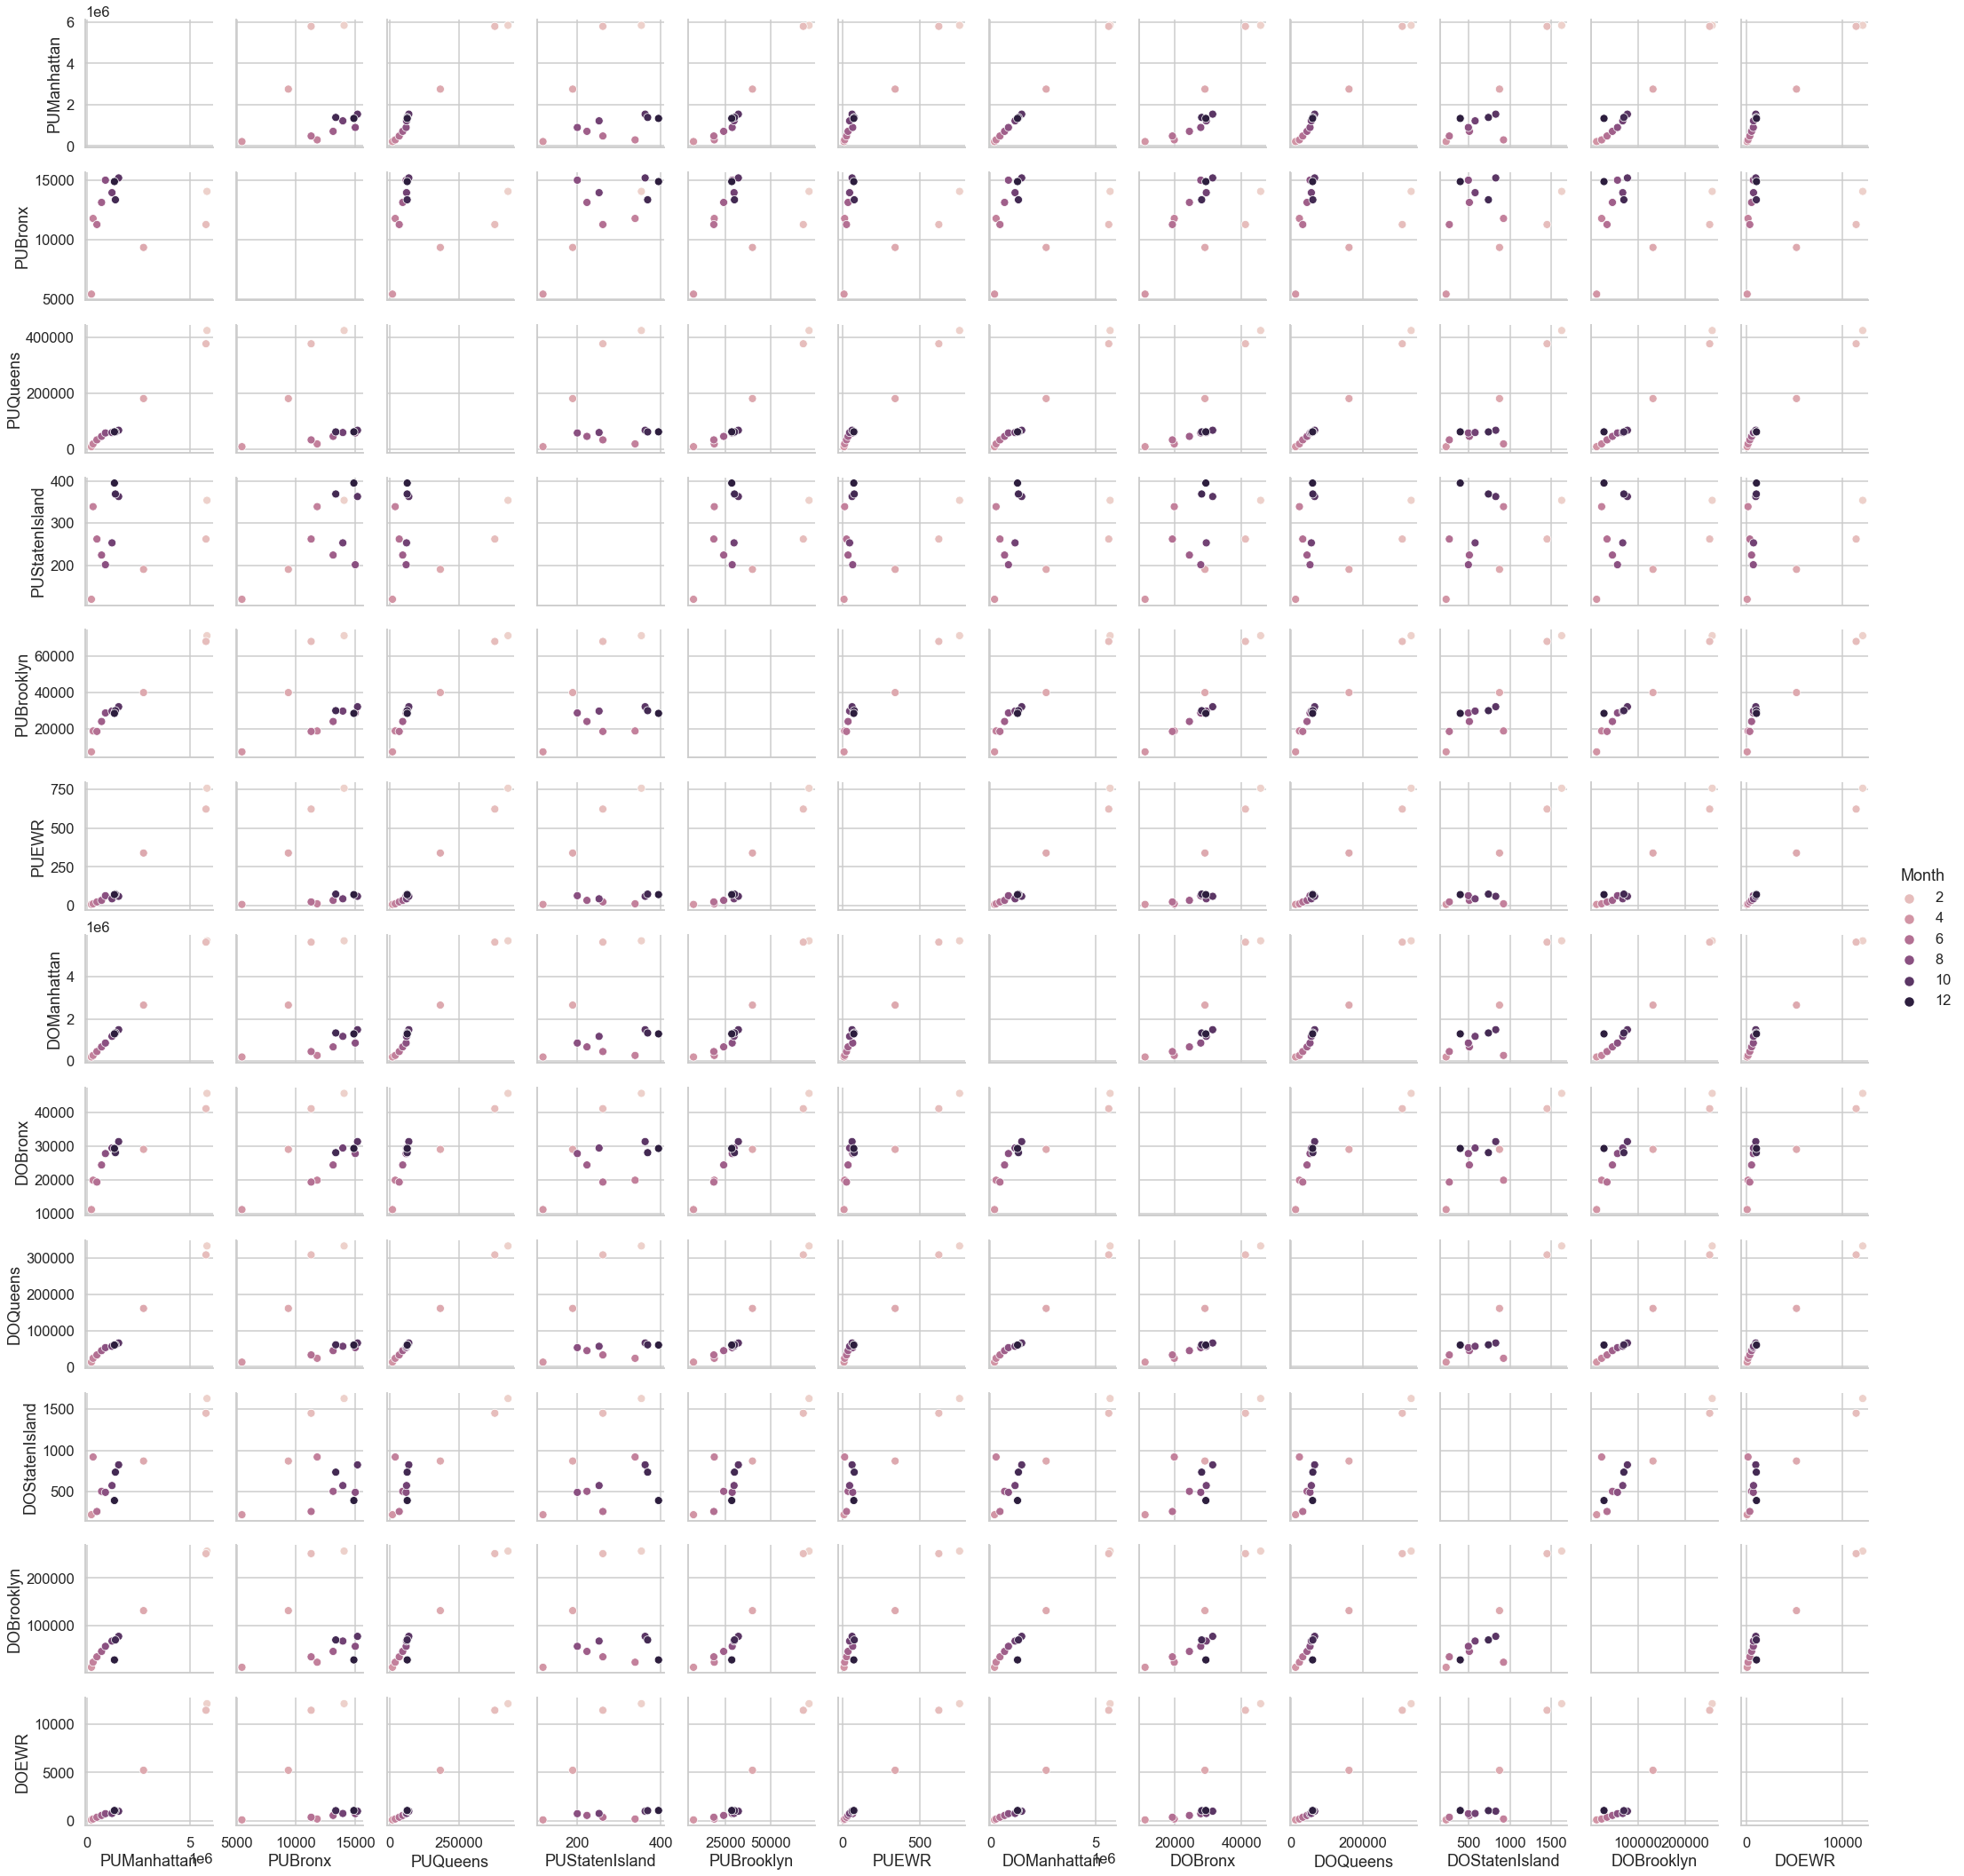

In [14]:
yellow_tripdata_2020['PUBronx'] = yellow_tripdata_2020['PUBronx'][:len(yellow_tripdata_2020)]
plt.figure();
sns.set(style='whitegrid', context='talk', palette='viridis');
sns.pairplot(data=yellow_tripdata_2020,hue='Month');

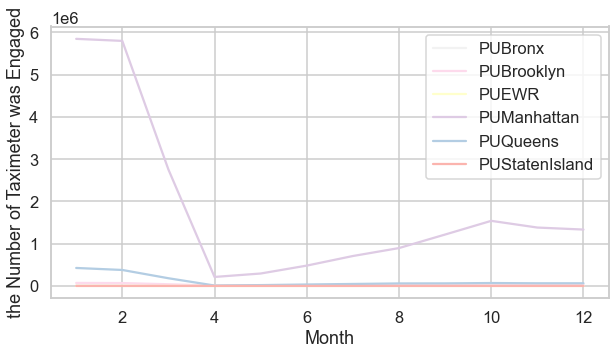

In [68]:
yellow_tripdata_2020.pivot_table(['PUStatenIsland','PUEWR','PUBrooklyn', 'PUBronx','PUManhattan', 'PUQueens'], index='Month').plot(figsize=(10,5),cmap="Pastel1_r")
plt.ylabel('the Number of Taximeter was Engaged');

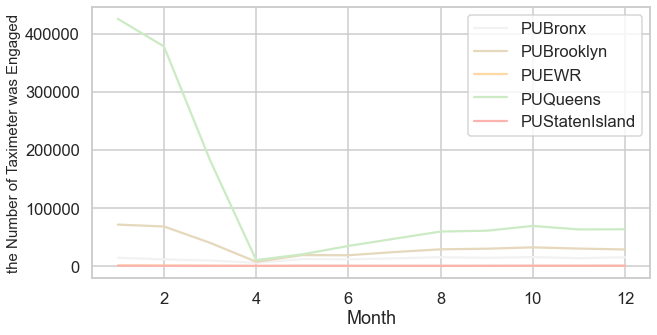

In [54]:
yellow_tripdata_2020.pivot_table(['PUStatenIsland','PUEWR','PUBrooklyn', 'PUBronx', 'PUQueens'], index='Month').plot(figsize=(10,5),cmap="Pastel1_r")
plt.ylabel('the Number of Taximeter was Engaged', fontsize=15);


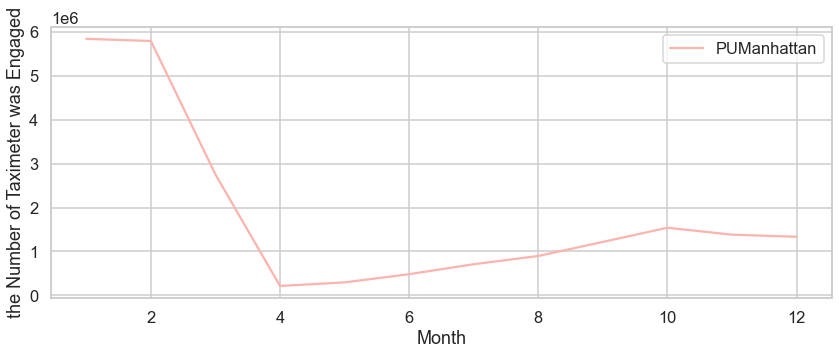

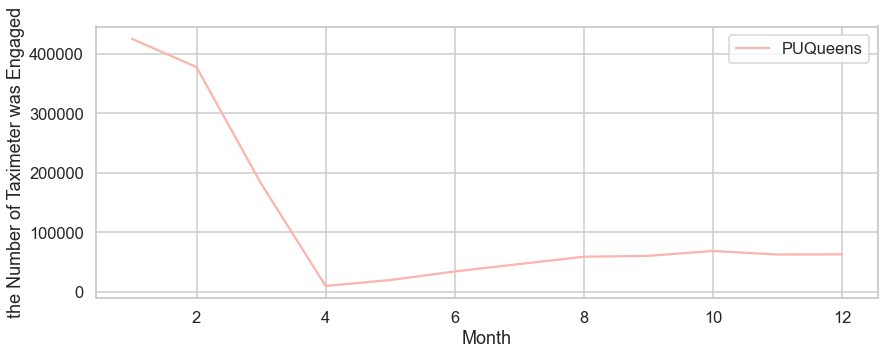

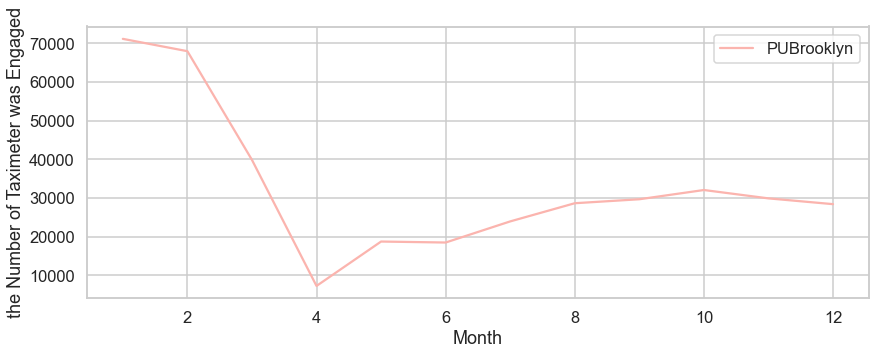

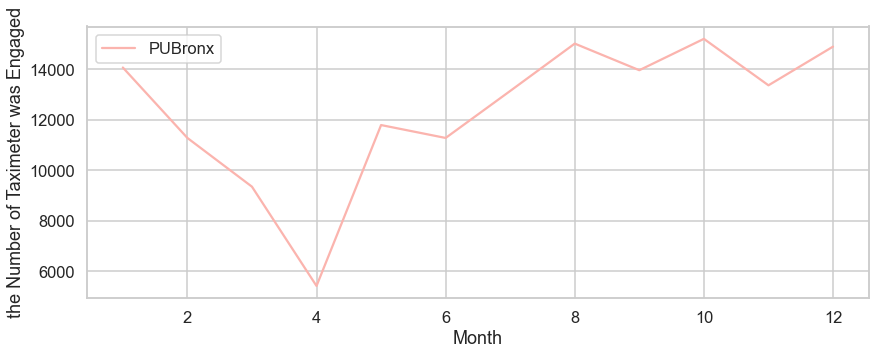

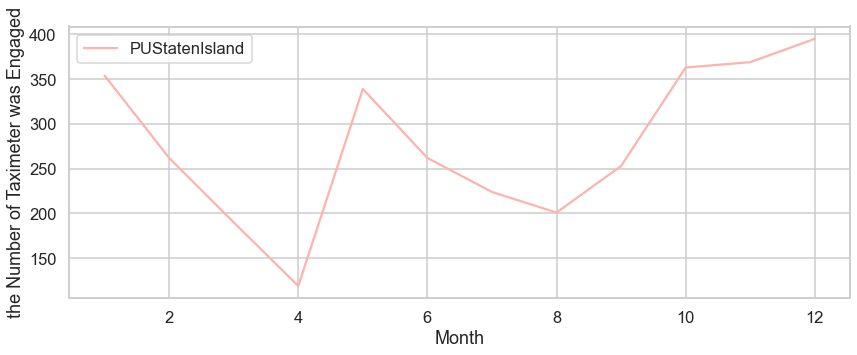

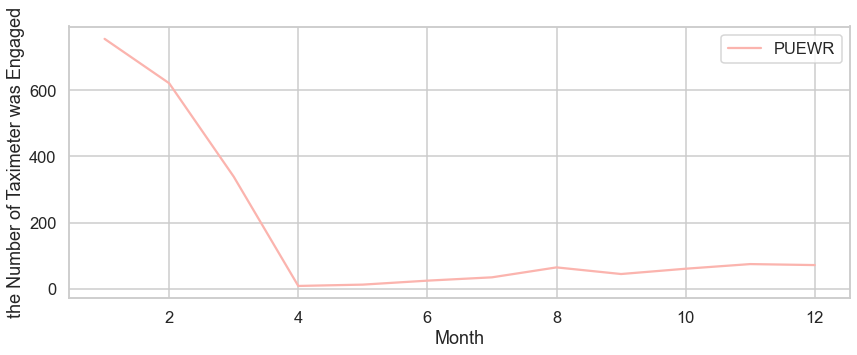

In [56]:
yellow_tripdata_2020.pivot_table(['PUManhattan'], index='Month').plot(figsize=(14,5),cmap="Pastel1")
plt.ylabel('the Number of Taximeter was Engaged');
yellow_tripdata_2020.pivot_table(['PUQueens'], index='Month').plot(figsize=(14,5),cmap="Pastel1")
plt.ylabel('the Number of Taximeter was Engaged');
yellow_tripdata_2020.pivot_table(['PUBrooklyn'], index='Month').plot(figsize=(14,5),cmap="Pastel1")
plt.ylabel('the Number of Taximeter was Engaged');
yellow_tripdata_2020.pivot_table(['PUBronx'], index='Month').plot(figsize=(14,5),cmap="Pastel1")
plt.ylabel('the Number of Taximeter was Engaged');
yellow_tripdata_2020.pivot_table(['PUStatenIsland'], index='Month').plot(figsize=(14,5),cmap="Pastel1")
plt.ylabel('the Number of Taximeter was Engaged');
yellow_tripdata_2020.pivot_table(['PUEWR'], index='Month').plot(figsize=(14,5),cmap="Pastel1")
plt.ylabel('the Number of Taximeter was Engaged');



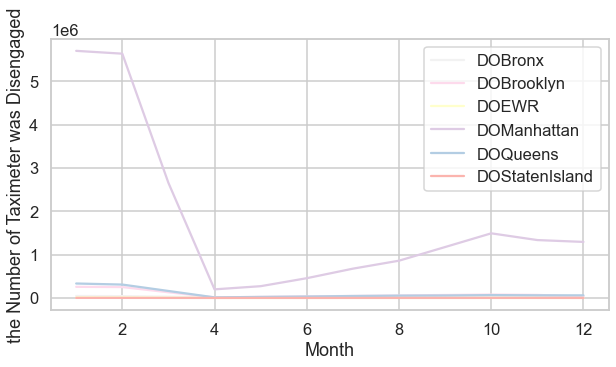

In [59]:
yellow_tripdata_2020.pivot_table(['DOStatenIsland','DOEWR','DOBrooklyn', 'DOBronx','DOManhattan', 'DOQueens'], index='Month').plot(figsize=(10,5),cmap="Pastel1_r")
plt.ylabel('the Number of Taximeter was Disengaged');

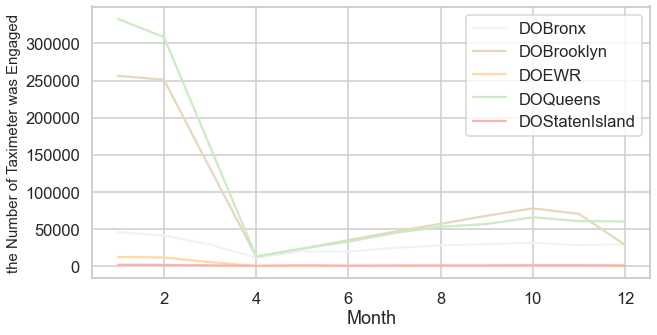

In [60]:
yellow_tripdata_2020.pivot_table(['DOStatenIsland','DOEWR','DOBrooklyn', 'DOBronx', 'DOQueens'], index='Month').plot(figsize=(10,5),cmap="Pastel1_r")
plt.ylabel('the Number of Taximeter was Engaged', fontsize=15);


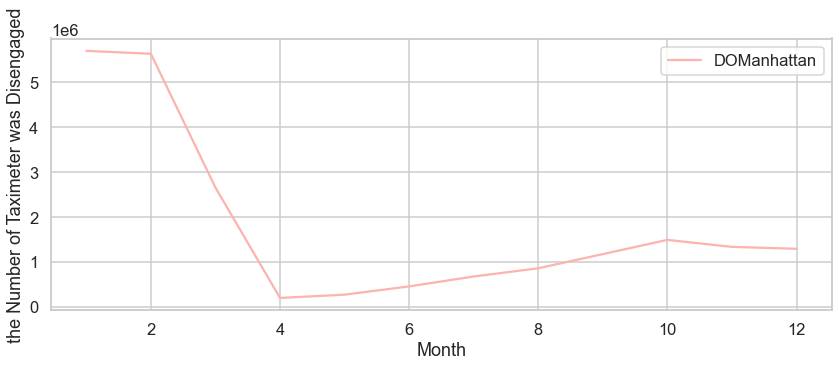

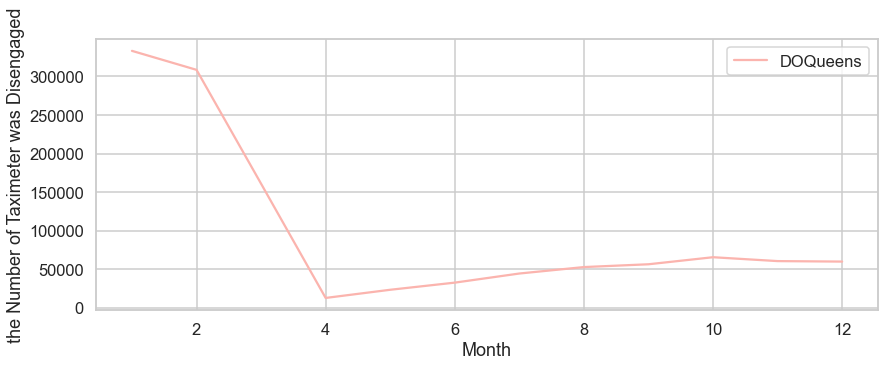

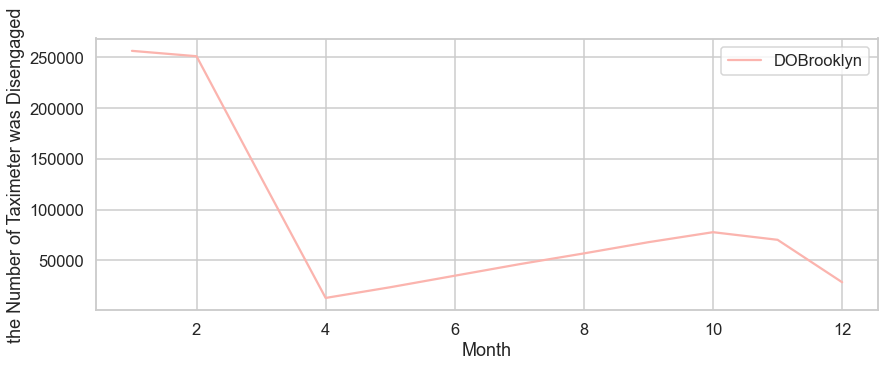

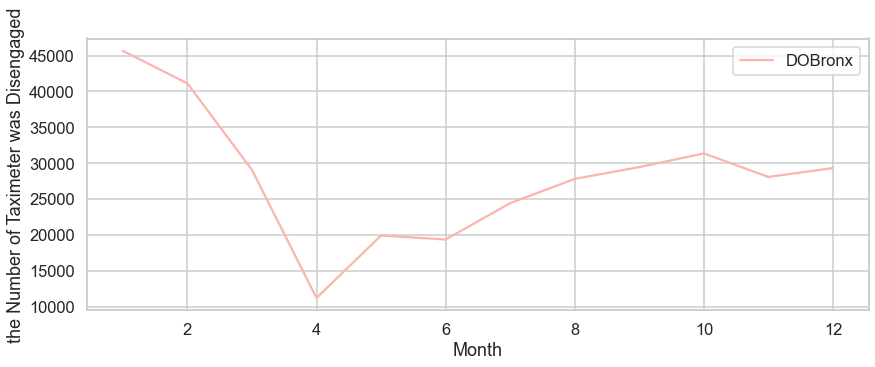

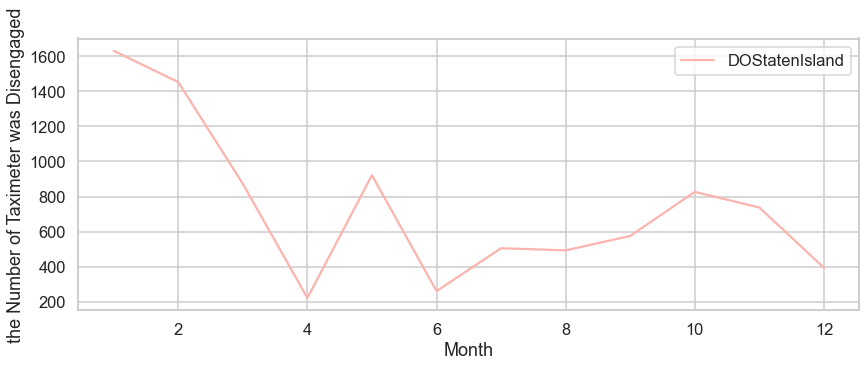

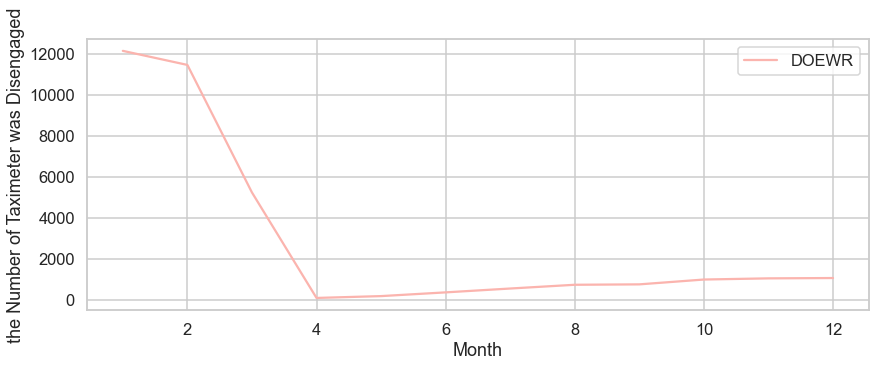

In [64]:
yellow_tripdata_2020.pivot_table(['DOManhattan'], index='Month').plot(figsize=(14,5),cmap="Pastel1")
plt.ylabel('the Number of Taximeter was Disengaged');
yellow_tripdata_2020.pivot_table(['DOQueens'], index='Month').plot(figsize=(14,5),cmap="Pastel1")
plt.ylabel('the Number of Taximeter was Disengaged');
yellow_tripdata_2020.pivot_table(['DOBrooklyn'], index='Month').plot(figsize=(14,5),cmap="Pastel1")
plt.ylabel('the Number of Taximeter was Disengaged');
yellow_tripdata_2020.pivot_table(['DOBronx'], index='Month').plot(figsize=(14,5),cmap="Pastel1")
plt.ylabel('the Number of Taximeter was Disengaged');
yellow_tripdata_2020.pivot_table(['DOStatenIsland'], index='Month').plot(figsize=(14,5),cmap="Pastel1")
plt.ylabel('the Number of Taximeter was Disengaged');
yellow_tripdata_2020.pivot_table(['DOEWR'], index='Month').plot(figsize=(14,5),cmap="Pastel1")
plt.ylabel('the Number of Taximeter was Disengaged');



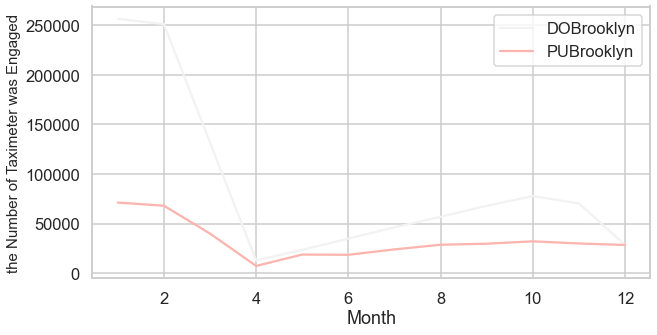

In [65]:
yellow_tripdata_2020.pivot_table(['PUBrooklyn','DOBrooklyn' ], index='Month').plot(figsize=(10,5),cmap="Pastel1_r")
plt.ylabel('the Number of Taximeter was Engaged', fontsize=15);